In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import linear_model
import math

In [2]:
df = pd.read_csv('houseprices.csv');
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [3]:
x = math.floor(df['bedrooms'].median());
df.bedrooms.fillna(x, inplace=True)
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [4]:
reg = linear_model.LinearRegression()
reg.fit(df[['area', 'bedrooms', 'age']],df.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [5]:
reg.predict([[3200,4,18]])

array([615307.4140366])

In [6]:
reg.coef_ 

array([  112.06244194, 23388.88007794, -3231.71790863])

In [7]:
reg.intercept_

221323.00186540408

In [8]:
df['price_predict'] = reg.predict(df[['area', 'bedrooms', 'age']])
df

,area,bedrooms,age,price,price_predict
0,2600,3.0,20,550000,518217.632976
1,3000,4.0,15,565000,602590.079374
2,3200,4.0,18,610000,615307.414037
3,3600,3.0,30,595000,597962.895832
4,4000,5.0,8,760000,760663.426755
5,4100,6.0,8,810000,795258.551027


In [9]:
#plt.scatter(df.area,df.bedrooms,df.age, df.price, color='red')
#plt.plot(df[['area','bedrooms','age']], reg.price, color='green')

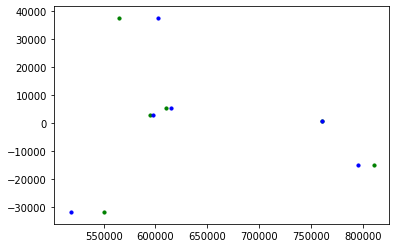

In [10]:
## plotting residual errors in training data 
plt.scatter(df.price, df.price_predict - df.price, 
            color = "green", s = 10, label = 'Train data') 
  
## plotting residual errors in test data 
plt.scatter(df.price_predict, df.price_predict - df.price, 
            color = "blue", s = 10, label = 'Test data') 

In [20]:
x2=(df.bedrooms - min(df.bedrooms))/(max(df.bedrooms)-min(df.bedrooms))
x2

0    0.000000
1    0.333333
2    0.333333
3    0.000000
4    0.666667
5    1.000000
Name: bedrooms, dtype: float64

In [21]:
x1=(df.area - min(df.area))/(max(df.area)-min(df.area))
x1

0    0.000000
1    0.266667
2    0.400000
3    0.666667
4    0.933333
5    1.000000
Name: area, dtype: float64

In [28]:
x3=(df.age - min(df.age))/(max(df.age)-min(df.age))
x3

0    0.545455
1    0.318182
2    0.454545
3    1.000000
4    0.000000
5    0.000000
Name: age, dtype: float64

In [31]:
y1=(df.price - min(df.price))/(max(df.price)-min(df.price))
y1

0    0.000000
1    0.057692
2    0.230769
3    0.173077
4    0.807692
5    1.000000
Name: price, dtype: float64

In [54]:
# Multivariante linear regression using gradient descent 
def gradient_descent(x1,x2,x3,y):
    m1=m2=m3=c=0;
    n=len(x1);
    alpha=0.0001;
    iteration=100;
    for i in range(iteration):
        y_pred = m1*x1 + m2*x2 + m3*x3 + c;
        cost = 1/(2*n)*sum((y-y_pred)**2)
        x0 = -2/n*sum(y-y_pred);
        x1 = -2/n*sum(x1*(y-y_pred));
        x2 = -2/n*sum(x2*(y-y_pred));
        x3 = -2/n*sum(x3*(y-y_pred));
        m1 = m1-alpha*x1;
        m2 = m2-alpha*x2;
        m3 = m3-alpha*x3;
        c = c-alpha*x0;
        print(cost)
        #print(y)
        #print(y_pred)
        #print(str(m1) + " " + str(m2) + " " + str(m3) + " " +str(c))
        
    #print(n);
    return m1,m2,m3,c

m1,m2,m3,c = gradient_descent(x1,x2,x3,y1)


0.14490877712031558
0.14490819010800196
0.14484641220673838
0.1448360532735157
0.14478978078527308
0.14477235440587388
0.1447341117180731
0.14471216633414577
0.14467824479975014
0.14465356753736713
0.14462203276933117
0.14459575341982084
0.14456556084681904
0.14453836030443545
0.14450893321580938
0.14448121180770776
0.1444522275215973
0.14442421742280087
0.14439549400374643
0.14436732880522019
0.14433876324443917
0.14431051944354212
0.14428205329540048
0.14425377455982297
0.14422537463172952
0.1441970858336995
0.1441687332688042
0.14414044855007738
0.1441121326351771
0.14408386002328574
0.14405557467149246
0.14402731871513513
0.14399906046687116
0.1439708237377012
0.14394259062466364
0.14391437457190684
0.14388616547170058
0.14385797090793817
0.14382978517765813
0.14380161255468205
0.14377344982301202
0.14374529938832872
0.143717159437667
0.14368903132321087
0.14366091402288952
0.14363280829526767
0.1436047135637479
0.143576630252674
0.14354855803616212
0.14352049715053378
0.1434924474

In [55]:
m1

3.751102468469802e-05

In [56]:
m2

3.101592507976002e-05

In [57]:
m3

5.6226730492185315e-06

In [58]:
z1 = (4100 - min(df.area))/(max(df.area)-min(df.area))
z2 = (6 - min(df.bedrooms))/(max(df.bedrooms)-min(df.bedrooms))
z3 = (8 - min(df.age))/(max(df.age)-min(df.age))

In [59]:
y = m1*z1+m2*z2+m3*z3 + c
y_pred = y*(max(df.price)-min(df.price)) + min(df.price)
print(y_pred)
print(y)

551965.1452864999
0.007558251101922379
